In [50]:
#Hypothesis- Can the given model predict the closing price of bitcoin for the last 60 days. Note: We are comparing the actual closing BTC price with the predicted closing BTC price.

import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM



In [27]:
#Get the stock quote from Sep 16, 2014 to Feb 6, 2022
df = web.DataReader(name = 'BTC-USD', data_source = 'yahoo', start = '2014-09-16', end = '2022-02-06')
#Show the data head and/or tail
#df.head()
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-03,37154.601562,36375.539062,36944.804688,37154.601562,18591534769,37154.601562
2022-02-04,41527.785156,37093.628906,37149.265625,41500.875000,29412210792,41500.875000
2022-02-05,41847.164062,41038.097656,41501.480469,41441.164062,19652846215,41441.164062
2022-02-06,42500.785156,41244.906250,41441.121094,42412.433594,16142097334,42412.433594
2022-02-07,44385.917969,41754.324219,42351.128906,44147.812500,29600956416,44147.812500


In [28]:
#Get the number of rows and columns in the data set
df.shape

(2701, 6)

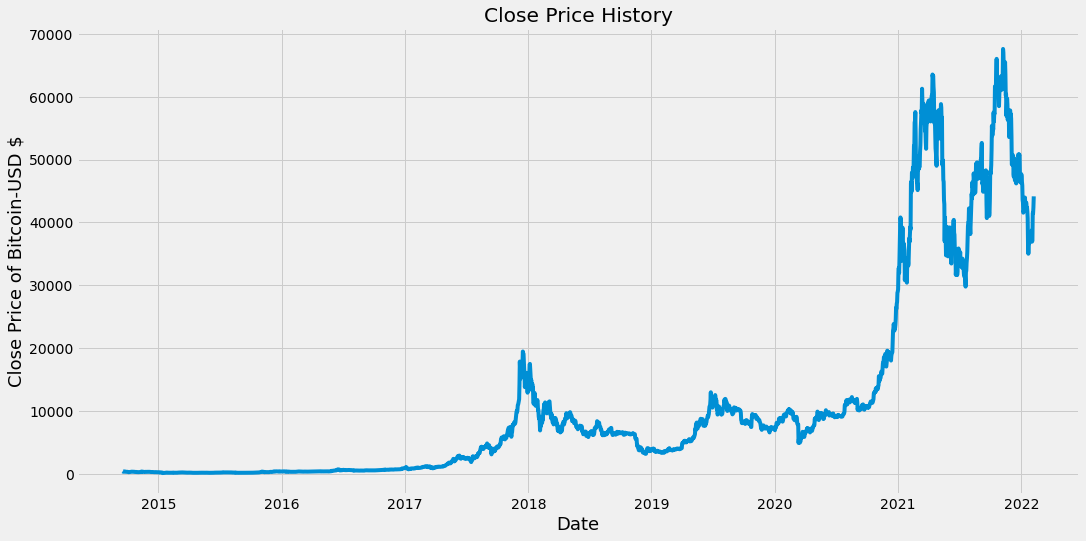

In [45]:
#visualize the closing price history
plt.figure( figsize = (16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price of Bitcoin-USD $', fontsize = 18)
plt.show()


In [57]:
#Create a New DataFrame with only the close Column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the LST model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len
dataset

array([[  457.33401489],
       [  424.44000244],
       [  394.79598999],
       ...,
       [41441.1640625 ],
       [42412.43359375],
       [44147.8125    ]])

In [58]:
#Scale the data 
scaler = MinMaxScaler(feature_range = (0,1)) #creates values between 0 to 1
scaled_data = scaler.fit_transform( dataset ) #computing the min and max values for the new dataset

scaled_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.61231402],
       [0.62672696],
       [0.65247873]])

In [61]:
#Create the training data sets
#Create the scaled training data set
training_data = scaled_data[0:training_data_len, :]

#Split the data into x_train and Y_train data sets
x_train = [] #empty list of independent training variables
y_train = [] #empty list of dependent training variables (targeted variables)

#Creating a loop
for i in range(60, len(training_data)):
    x_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i,0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()



[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.00292874, 0.00309905, 0.00304965,
       0.00292288, 0.00269198, 0.00223721, 0.00211322, 0.00225521,
       0.00234585, 0.00259445, 0.0027738 , 0.0027224 , 0.00273334,
       0.00297447, 0.00315054, 0.0033057 , 0.00321523, 0.00303393,
       0.00305177, 0.0031658 , 0.00313766, 0.00303822, 0.00309209,
       0.00304287, 0.00267573, 0.00267466, 0.00251033, 0.00262063,
       0.00259518, 0.00266387, 0.00233701, 0.00248116, 0.00237752,
       0.00219096, 0.00219308, 0.00221774, 0.00226134, 0.00239481,
       0.00254029, 0.00243827, 0.00248387, 0.00274766, 0.00280197,
       0.00281341, 0.00364242, 0.00360048, 0.00326041, 0.00293862])]
[0.0031129686946921404]

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.

In [62]:
#convert the x and y train into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [65]:
#Reshape the data ( Needs to be 3 Dimensional and not 2 Dimensional)
x_train.shape

(2101, 60)

In [68]:
#Reshaping the data into a 3 dimenisonal array
x_train = np.reshape(x_train, (x_train.shape[0], 60, 1))

In [75]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [76]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [77]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)


2101/2101 [==============================] - 73s 33ms/step - loss: 2.1053e-04


In [79]:
#Create the testing data set
#Create a new array containing scaled values from index 2101 to 2161
test_data = scaled_data[training_data_len - 60:, :]

#Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] #The test values that we want to predict
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
#x_test dataset contains the past 60 values
#y_test dataset contains the actual 60 first values (normal values, not to scale)



In [80]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [83]:
#Reshape x_test into a 3 dimenisonal array
x_test = np.reshape( x_test, (x_test.shape[0], 60, 1))
x_test.shape

(540, 60, 1)

In [84]:
#Get the model's predictions price values
#For x_test data set
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)



In [86]:
#Get the root mean squared error (rmse)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

7568.969950810185

<ipython-input-93-bb17f10957c5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


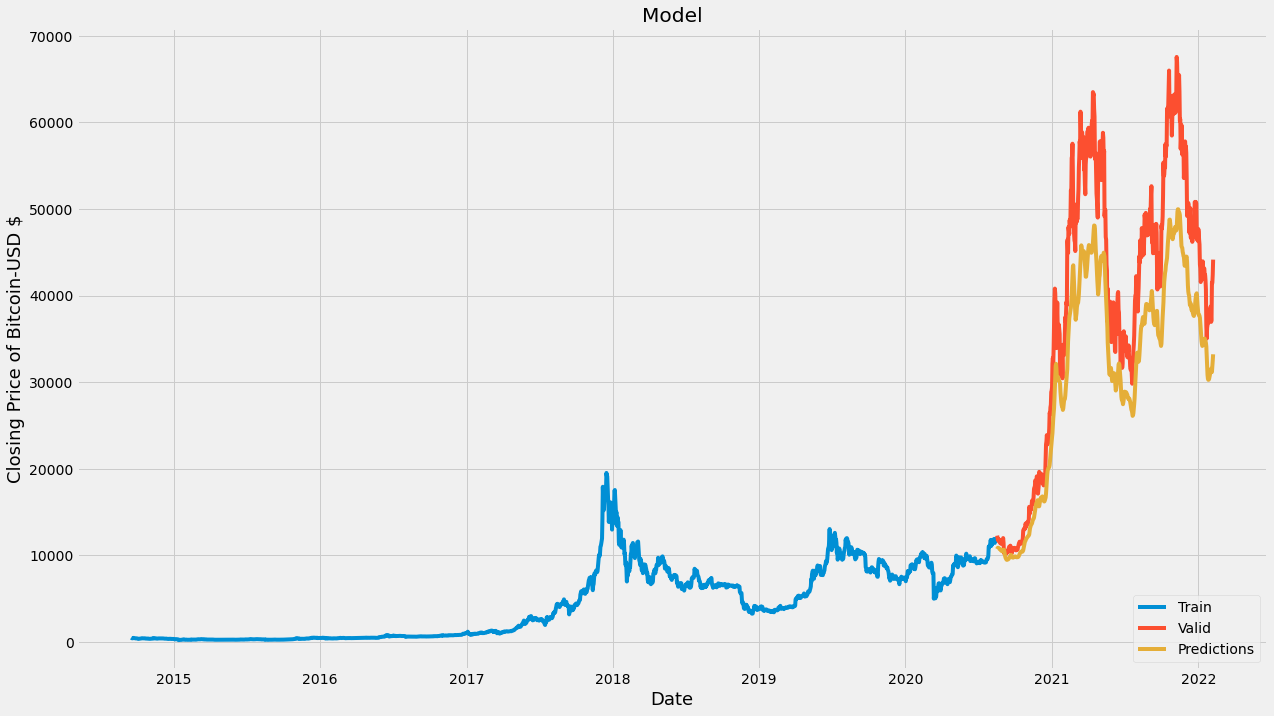

In [93]:
#Plot our Result
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize the data
plt.figure(figsize = (19,11))
plt.title('Model')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price of Bitcoin-USD $', fontsize = 18)
plt.legend(['Train', 'Valid', 'Predictions'], loc = 'lower right')
plt.show()
